# Results vary sligtly from rapport because of a tired mind that accidently clearded outputs then saved....

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras.metrics
import keras.regularizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.preprocessing.sequence import TimeseriesGenerator

In [3]:
df = pd.read_csv('BestFeatures.csv', header=0, sep=',',decimal='.', skip_blank_lines=True, parse_dates=['Date'])

In [4]:
df.set_index('Date', inplace=True)
cols = list(df.columns.values) 
cols.pop(cols.index('SE3'))
df = df[cols+['SE3']]

In [5]:
n_inputs = 24
n_features = df.shape[1]

df_y = df['SE3']

In [6]:
def cross_validator(number: int, size: int, dataset):
    parts = []
    start = 0
    end = size
    for i in range(number):
        parts.append(dataset.iloc[start:end, :])
        start += size
        end += size
    return parts

In [7]:
parts = cross_validator(20, len(df)//20, df)

In [8]:
regressor = Sequential()

regressor.add(LSTM(100, kernel_regularizer=keras.regularizers.L1(), input_shape = (n_inputs, n_features), dropout=0.2))
regressor.add(RepeatVector(1))
regressor.add(LSTM(100, return_sequences=True))
regressor.add(TimeDistributed(Dense(1)))

regressor.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002),  loss="mse",metrics=[keras.metrics.RootMeanSquaredError(name="RMSE"), keras.metrics.MeanAbsoluteError(name="MAE"), keras.metrics.MeanAbsolutePercentageError(name="MAPE")])


Epoch 1/50
590/590 [==============================] - 16s 18ms/step - loss: 18.3068 - RMSE: 0.6701 - MAE: 0.4137 - MAPE: 253.9238
Epoch 2/50
590/590 [==============================] - 10s 17ms/step - loss: 0.8279 - RMSE: 0.5213 - MAE: 0.3192 - MAPE: 208.9282
Epoch 3/50
590/590 [==============================] - 11s 19ms/step - loss: 0.4082 - RMSE: 0.4624 - MAE: 0.2727 - MAPE: 189.2547
Epoch 4/50
590/590 [==============================] - 12s 20ms/step - loss: 0.3405 - RMSE: 0.4361 - MAE: 0.2627 - MAPE: 207.1803
Epoch 5/50
590/590 [==============================] - 12s 20ms/step - loss: 0.3480 - RMSE: 0.4417 - MAE: 0.2656 - MAPE: 153.6774
Epoch 6/50
590/590 [==============================] - 11s 19ms/step - loss: 0.2768 - RMSE: 0.4102 - MAE: 0.2459 - MAPE: 148.8400
Epoch 7/50
590/590 [==============================] - 11s 19ms/step - loss: 0.3030 - RMSE: 0.4223 - MAE: 0.2551 - MAPE: 180.1359
Epoch 8/50
590/590 [==============================] - 11s 19ms/step - loss: 0.2649 - RMSE: 0.402

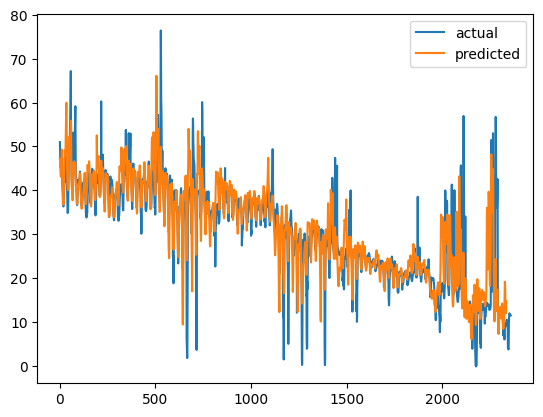

Epoch 1/50
649/649 [==============================] - 11s 17ms/step - loss: 0.2255 - RMSE: 0.3586 - MAE: 0.2226 - MAPE: 256.9037
Epoch 2/50
649/649 [==============================] - 11s 17ms/step - loss: 0.2367 - RMSE: 0.3623 - MAE: 0.2221 - MAPE: 243.3244
Epoch 3/50
649/649 [==============================] - 12s 18ms/step - loss: 0.2557 - RMSE: 0.3653 - MAE: 0.2288 - MAPE: 317.2749
Epoch 4/50
649/649 [==============================] - 12s 19ms/step - loss: 0.2252 - RMSE: 0.3538 - MAE: 0.2206 - MAPE: 295.6887
Epoch 5/50
649/649 [==============================] - 12s 19ms/step - loss: 0.2217 - RMSE: 0.3563 - MAE: 0.2179 - MAPE: 259.8295
Epoch 6/50
649/649 [==============================] - 11s 17ms/step - loss: 0.2493 - RMSE: 0.3507 - MAE: 0.2218 - MAPE: 298.9785
Epoch 7/50
649/649 [==============================] - 11s 16ms/step - loss: 0.1935 - RMSE: 0.3429 - MAE: 0.2097 - MAPE: 284.4479
Epoch 8/50
649/649 [==============================] - 11s 17ms/step - loss: 0.2720 - RMSE: 0.3725

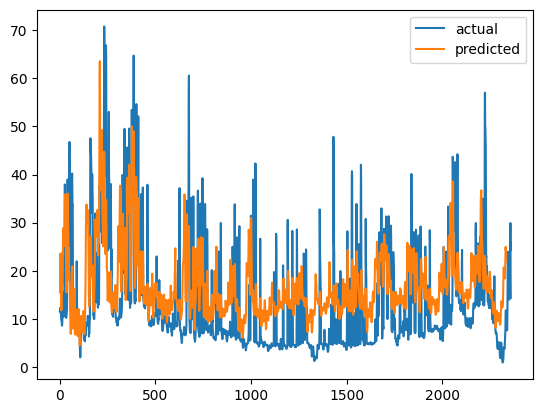

Epoch 1/50
708/708 [==============================] - 13s 18ms/step - loss: 0.2039 - RMSE: 0.3143 - MAE: 0.1893 - MAPE: 129.5726
Epoch 2/50
708/708 [==============================] - 12s 18ms/step - loss: 0.1720 - RMSE: 0.2947 - MAE: 0.1819 - MAPE: 107.6607
Epoch 3/50
708/708 [==============================] - 12s 17ms/step - loss: 0.2235 - RMSE: 0.3174 - MAE: 0.1903 - MAPE: 115.9623
Epoch 4/50
708/708 [==============================] - 14s 20ms/step - loss: 0.2575 - RMSE: 0.3166 - MAE: 0.1913 - MAPE: 111.8734
Epoch 5/50
708/708 [==============================] - 12s 17ms/step - loss: 0.2179 - RMSE: 0.3085 - MAE: 0.1904 - MAPE: 120.1114
Epoch 6/50
708/708 [==============================] - 14s 19ms/step - loss: 0.1844 - RMSE: 0.2928 - MAE: 0.1811 - MAPE: 112.3626
Epoch 7/50
708/708 [==============================] - 12s 17ms/step - loss: 0.1805 - RMSE: 0.2919 - MAE: 0.1800 - MAPE: 111.0292
Epoch 8/50
708/708 [==============================] - 12s 17ms/step - loss: 0.1890 - RMSE: 0.2956

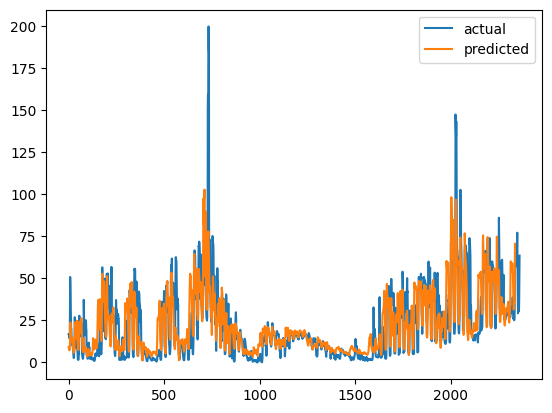

Epoch 1/50
767/767 [==============================] - 16s 21ms/step - loss: 0.2801 - RMSE: 0.3098 - MAE: 0.1811 - MAPE: 271.3325
Epoch 2/50
767/767 [==============================] - 14s 18ms/step - loss: 0.1965 - RMSE: 0.2880 - MAE: 0.1704 - MAPE: 281.4269
Epoch 3/50
767/767 [==============================] - 14s 18ms/step - loss: 0.3806 - RMSE: 0.3406 - MAE: 0.1960 - MAPE: 261.4029
Epoch 4/50
767/767 [==============================] - 14s 18ms/step - loss: 0.2302 - RMSE: 0.3094 - MAE: 0.1766 - MAPE: 376.5316
Epoch 5/50
767/767 [==============================] - 14s 18ms/step - loss: 0.1763 - RMSE: 0.2853 - MAE: 0.1693 - MAPE: 321.1853
Epoch 6/50
767/767 [==============================] - 14s 18ms/step - loss: 0.1710 - RMSE: 0.2838 - MAE: 0.1669 - MAPE: 355.0230
Epoch 7/50
767/767 [==============================] - 14s 18ms/step - loss: 0.1887 - RMSE: 0.2786 - MAE: 0.1697 - MAPE: 269.1961
Epoch 8/50
767/767 [==============================] - 14s 18ms/step - loss: 0.2013 - RMSE: 0.2949

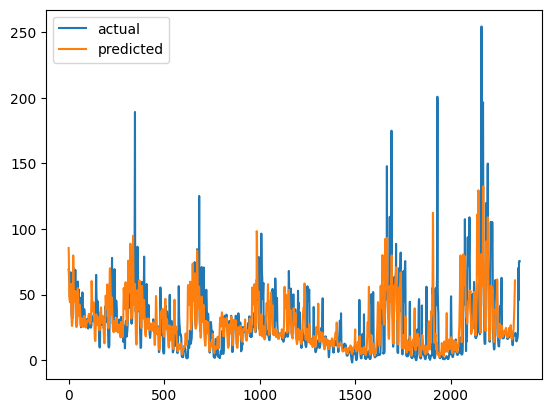

Epoch 1/50
826/826 [==============================] - 15s 18ms/step - loss: 0.2455 - RMSE: 0.3118 - MAE: 0.1726 - MAPE: 151.6138
Epoch 2/50
826/826 [==============================] - 14s 17ms/step - loss: 0.2251 - RMSE: 0.3130 - MAE: 0.1727 - MAPE: 149.3807
Epoch 3/50
826/826 [==============================] - 14s 16ms/step - loss: 0.2129 - RMSE: 0.3010 - MAE: 0.1694 - MAPE: 143.9192
Epoch 4/50
826/826 [==============================] - 14s 17ms/step - loss: 0.2929 - RMSE: 0.3272 - MAE: 0.1808 - MAPE: 145.3407
Epoch 5/50
826/826 [==============================] - 14s 17ms/step - loss: 0.2224 - RMSE: 0.3152 - MAE: 0.1706 - MAPE: 142.5868
Epoch 6/50
826/826 [==============================] - 14s 17ms/step - loss: 0.2226 - RMSE: 0.3006 - MAE: 0.1674 - MAPE: 148.6223
Epoch 7/50
826/826 [==============================] - 15s 18ms/step - loss: 0.2288 - RMSE: 0.3065 - MAE: 0.1705 - MAPE: 138.5479
Epoch 8/50
826/826 [==============================] - 15s 18ms/step - loss: 0.2054 - RMSE: 0.2940

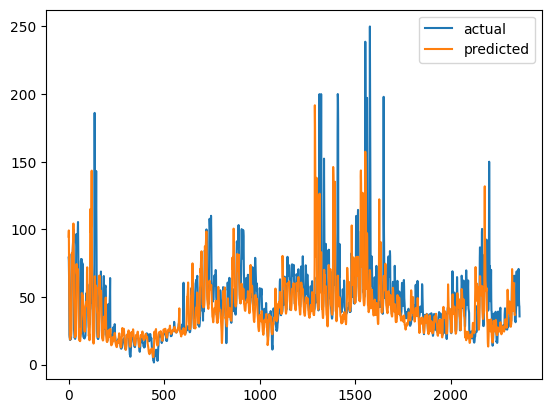

Epoch 1/50
885/885 [==============================] - 16s 18ms/step - loss: 0.3255 - RMSE: 0.3288 - MAE: 0.1812 - MAPE: 122.9027
Epoch 2/50
885/885 [==============================] - 15s 17ms/step - loss: 0.2402 - RMSE: 0.2960 - MAE: 0.1638 - MAPE: 105.3005
Epoch 3/50
885/885 [==============================] - 14s 16ms/step - loss: 0.2476 - RMSE: 0.3061 - MAE: 0.1677 - MAPE: 137.4048
Epoch 4/50
885/885 [==============================] - 15s 17ms/step - loss: 0.2757 - RMSE: 0.3109 - MAE: 0.1680 - MAPE: 122.7958
Epoch 5/50
885/885 [==============================] - 17s 19ms/step - loss: 0.1976 - RMSE: 0.2981 - MAE: 0.1602 - MAPE: 116.4774
Epoch 6/50
885/885 [==============================] - 17s 19ms/step - loss: 0.2342 - RMSE: 0.2926 - MAE: 0.1617 - MAPE: 112.2388
Epoch 7/50
885/885 [==============================] - 17s 19ms/step - loss: 0.2644 - RMSE: 0.3033 - MAE: 0.1667 - MAPE: 106.8926
Epoch 8/50
885/885 [==============================] - 16s 18ms/step - loss: 0.2590 - RMSE: 0.3111

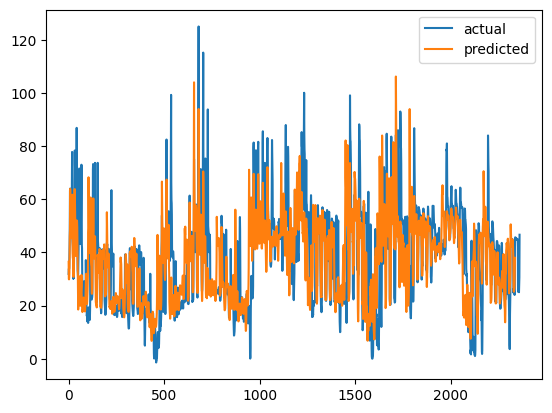

Epoch 1/50
944/944 [==============================] - 17s 17ms/step - loss: 0.2730 - RMSE: 0.3032 - MAE: 0.1683 - MAPE: 103.7111
Epoch 2/50
944/944 [==============================] - 17s 18ms/step - loss: 0.2523 - RMSE: 0.3029 - MAE: 0.1682 - MAPE: 100.6976
Epoch 3/50
944/944 [==============================] - 15s 16ms/step - loss: 0.1848 - RMSE: 0.2767 - MAE: 0.1602 - MAPE: 96.7296
Epoch 4/50
944/944 [==============================] - 15s 16ms/step - loss: 0.2248 - RMSE: 0.2888 - MAE: 0.1661 - MAPE: 93.6728
Epoch 5/50
944/944 [==============================] - 16s 17ms/step - loss: 0.2926 - RMSE: 0.3100 - MAE: 0.1712 - MAPE: 98.5877
Epoch 6/50
944/944 [==============================] - 17s 18ms/step - loss: 0.3008 - RMSE: 0.3119 - MAE: 0.1714 - MAPE: 100.4249
Epoch 7/50
944/944 [==============================] - 15s 16ms/step - loss: 0.1923 - RMSE: 0.2885 - MAE: 0.1605 - MAPE: 89.7152
Epoch 8/50
944/944 [==============================] - 16s 17ms/step - loss: 0.2224 - RMSE: 0.2905 - M

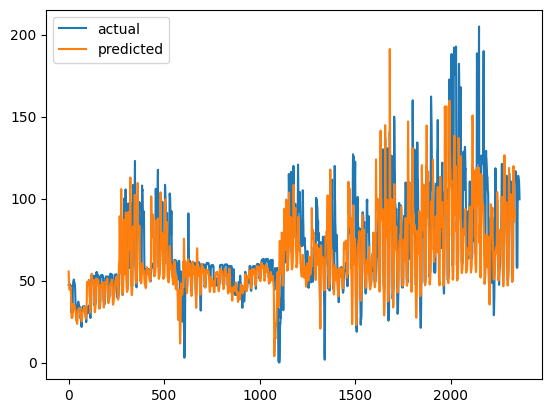

Epoch 1/50
1003/1003 [==============================] - 16s 16ms/step - loss: 0.2730 - RMSE: 0.3072 - MAE: 0.1644 - MAPE: 113.5817
Epoch 2/50
1003/1003 [==============================] - 16s 16ms/step - loss: 0.2139 - RMSE: 0.2785 - MAE: 0.1534 - MAPE: 116.6315
Epoch 3/50
1003/1003 [==============================] - 17s 17ms/step - loss: 0.2557 - RMSE: 0.2964 - MAE: 0.1621 - MAPE: 117.0814
Epoch 4/50
1003/1003 [==============================] - 18s 18ms/step - loss: 0.1791 - RMSE: 0.2636 - MAE: 0.1498 - MAPE: 116.4703
Epoch 5/50
1003/1003 [==============================] - 18s 18ms/step - loss: 0.2246 - RMSE: 0.2720 - MAE: 0.1548 - MAPE: 119.5832
Epoch 6/50
1003/1003 [==============================] - 18s 18ms/step - loss: 0.2057 - RMSE: 0.2762 - MAE: 0.1520 - MAPE: 127.3532
Epoch 7/50
1003/1003 [==============================] - 18s 18ms/step - loss: 0.2063 - RMSE: 0.2707 - MAE: 0.1539 - MAPE: 116.2540
Epoch 8/50
1003/1003 [==============================] - 17s 17ms/step - loss: 0.214

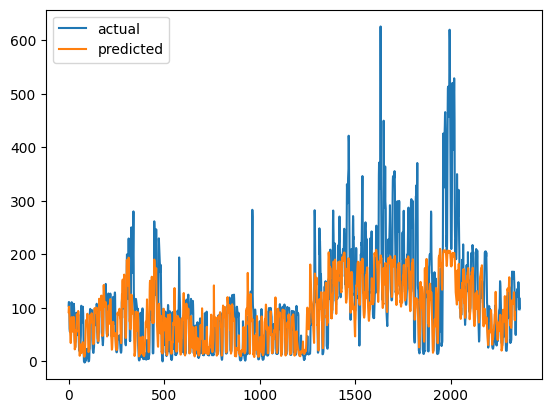

Epoch 1/50
1062/1062 [==============================] - 19s 18ms/step - loss: 0.4271 - RMSE: 0.3373 - MAE: 0.1500 - MAPE: 659.2866
Epoch 2/50
1062/1062 [==============================] - 17s 16ms/step - loss: 0.8709 - RMSE: 0.4527 - MAE: 0.1740 - MAPE: 1129.4336
Epoch 3/50
1062/1062 [==============================] - 16s 15ms/step - loss: 0.5812 - RMSE: 0.3688 - MAE: 0.1501 - MAPE: 748.9161
Epoch 4/50
1062/1062 [==============================] - 19s 18ms/step - loss: 0.2159 - RMSE: 0.2887 - MAE: 0.1278 - MAPE: 733.9690
Epoch 5/50
1062/1062 [==============================] - 19s 18ms/step - loss: 0.4593 - RMSE: 0.3462 - MAE: 0.1506 - MAPE: 1039.7053
Epoch 6/50
1062/1062 [==============================] - 19s 18ms/step - loss: 0.2491 - RMSE: 0.2853 - MAE: 0.1314 - MAPE: 766.7540
Epoch 7/50
1062/1062 [==============================] - 19s 18ms/step - loss: 0.2259 - RMSE: 0.2796 - MAE: 0.1313 - MAPE: 605.1305
Epoch 8/50
1062/1062 [==============================] - 19s 18ms/step - loss: 0.2

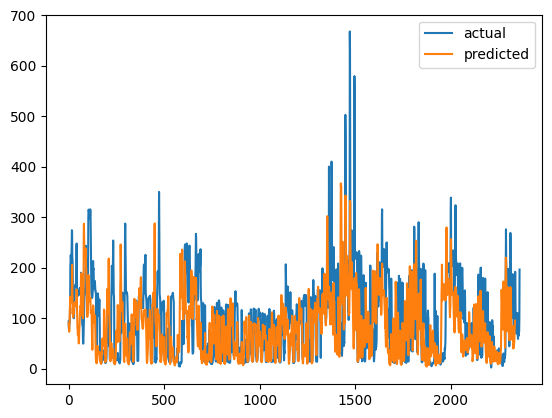

Epoch 1/50
1121/1121 [==============================] - 21s 18ms/step - loss: 0.3553 - RMSE: 0.3330 - MAE: 0.1493 - MAPE: 126.7824
Epoch 2/50
1121/1121 [==============================] - 19s 17ms/step - loss: 0.2809 - RMSE: 0.3075 - MAE: 0.1370 - MAPE: 118.2948
Epoch 3/50
1121/1121 [==============================] - 19s 17ms/step - loss: 0.2295 - RMSE: 0.2863 - MAE: 0.1304 - MAPE: 117.2502
Epoch 4/50
1121/1121 [==============================] - 18s 16ms/step - loss: 0.2755 - RMSE: 0.2981 - MAE: 0.1347 - MAPE: 118.4201
Epoch 5/50
1121/1121 [==============================] - 18s 16ms/step - loss: 0.2511 - RMSE: 0.2972 - MAE: 0.1348 - MAPE: 125.8839
Epoch 6/50
1121/1121 [==============================] - 19s 17ms/step - loss: 0.2676 - RMSE: 0.3041 - MAE: 0.1368 - MAPE: 130.1870
Epoch 7/50
1121/1121 [==============================] - 20s 18ms/step - loss: 0.2598 - RMSE: 0.2851 - MAE: 0.1314 - MAPE: 115.3991
Epoch 8/50
1121/1121 [==============================] - 20s 18ms/step - loss: 0.260

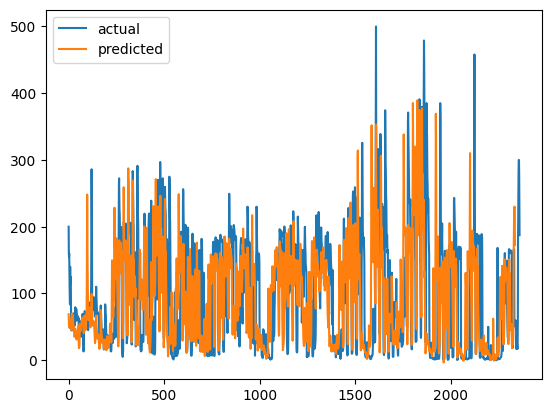

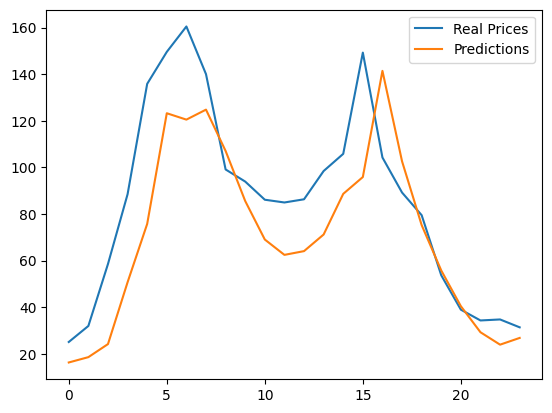

In [9]:
for i in range(10):
        train_list  = [parts[train_part] for train_part in range(10 + i)]
        train = pd.concat(train_list)
        test = parts[10 + i]

        generator_train = TimeseriesGenerator(train, train["SE3"], length=n_inputs, batch_size=40)
        generator_test = TimeseriesGenerator(test, test["SE3"], length=n_inputs, batch_size=40)

        sc =  StandardScaler()
        sc_y = StandardScaler()

        sc.fit(generator_train.data)
        sc_y.fit(generator_train.targets.to_numpy().reshape(-1, 1))

        generator_train.data = sc.transform(generator_train.data)
        generator_train.targets = sc_y.transform(generator_train.targets.to_numpy().reshape(-1, 1))

        generator_test.data = sc.transform(generator_test.data)
        generator_test.targets = sc_y.transform(generator_test.targets.to_numpy().reshape(-1, 1))

        regressor.fit(generator_train, epochs = 50)

        pred =  regressor.predict(generator_test)

        re_yhat = sc_y.inverse_transform(pred.reshape(pred.shape[0], 1))
        re_y = sc_y.inverse_transform(generator_test.targets)

        sa = re_y.copy()
        sa = sa[:-n_inputs]

        rmse = np.sqrt(keras.metrics.mean_squared_error(sa[:,0], re_yhat[:,0]))
        mae = keras.metrics.mean_absolute_error(sa[:,0], re_yhat[:,0])
        
        print('Test Score: %.2f RMSE' % (rmse))
        print('Test Score: %.2f MAE' % (mae))


        plt.plot(re_y, label="actual")
        plt.plot(re_yhat, label="predicted")
        plt.legend()
        plt.show()

pred_last24_y  = re_yhat[-84:-60]
real_last24_y = re_y[-84:-60]


plt.plot(real_last24_y, label="Real Prices")
plt.plot(pred_last24_y, label="Predictions")
plt.legend()
plt.show()